![image](aFAO-GENERAL-SERVICES-JOBS.png)

# Projet 4 : Réalisez une étude de santé publique avec R
---

### Sommaire

### [Marc](#sec:Marc)

[1-La proportion de personnes en état de sous-nutrition](#sec:1-Laproportiondepersonnesenétatdesous-nutrition)

[2-Le nombre théorique de personnes qui pourraient être nourries](#sec:2-Lenombrethéoriquedepersonnesquipourraientêtrenourries)

[3-Le nombre théorique de personnes qui pourraient être nourries des produits végétaux](#sec:3-Lenombrethéoriquedepersonnesquipourraientêtrenourriesdesproduitsvégétaux)

[4-L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine](#sec:4-disponibilitéintérieure)


### [Julien](#sec:Julien)

[1-L’utilisation des céréales](#sec:1-L’utilisationdescéréales)

[2-Etat particulier : Manioc en Thaïlande](#sec:2-ManiocenThaïlande)


### [Mélanie](#sec:Mélanie)

[1-Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017](#sec:1-Lespayspourlesquelslaproportiondepersonnessous-alimentéesestlaplusforteen2017)

[2-Les pays qui ont le plus bénéficié d’aide depuis 2013](#sec:2-Lespaysquiontleplusbénéficiéd’aidedepuis2013)

[3-Les pays ayant le plus ou le moins de disponibilité/habitant](#sec:3-Lespaysayantleplusoulemoinsdedisponibilité/habitant)

[4-Des infos utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire](#sec:Mélanie4)

### [Conclusion et perspectives](#sec:Conclusion)

 ---

### Inroduction 

Je suis data analyst au sein d'une équipe de chercheurs de la Food and Agriculture Organization of the United Nations (FAO); l’un des organes qui composent l’ONU et dont l’objectif est « d’aider à construire un monde libéré de la faim ».

Ce rapport présente un panorama de l’état de la malnutrition dans le monde demandée par Marc (le responsable de l’équipe : un chercheur en économie de la santé)  pour l'année 2017 au niveau mondiale et Mélanie (une autre chercheuse de l’équipe) qui avait des demandes plus fine pour chacun des pays. Quelques remarques faites par Julien, mon prédécesseur, ont également été étudiées.

In [314]:
rm(list=ls()) # On efface le cache (Pour ne pas saturer la mémoire vive Ram)

#### Les librairies utiles pour le projet

Package (data.table) pour traitement des données sous la forme de tableaux 

Package (dplyr) pour le traitement des données sous la forme de tableaux 

In [315]:
library(data.table)
library(dplyr)

#### Charger les données (Les 4 fichiers CSV) et corriger les lettres bizzares (Ã,©....etc)

Il y a 4 fichiers CSV à disposition :

Un fichier de disponibilité alimentaire pour l’année 2013 qui contient 17 variables :
- Le pays.
- Le produit.
- 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités
bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter
cependant que la notation kcal est un abus de langage, elle correspond à une calorie
réelle.
- 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité
alimentaire. Elles sont toutes exprimées en milliers de tonnes.
- Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

In [316]:
dispo_alimentaire <- fread("RESSOURCES/dispo_alimentaire.csv", encoding = "UTF-8")
dispo_alimentaire <- setDT(dispo_alimentaire) # on transforme les données d'entrée en data table pour faciliter le traitement
head(dispo_alimentaire)

Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Abats Comestible,animale,NA,NA,5,1.72,0.20,0.77,53,NA,NA,53,NA,53,NA,NA,NA
Afghanistan,"Agrumes, Autres",vegetale,NA,NA,1,1.29,0.01,0.02,41,2,40,39,2,3,NA,NA,NA
Afghanistan,Aliments pour enfants,vegetale,NA,NA,1,0.06,0.01,0.03,2,NA,2,2,NA,NA,NA,NA,NA
Afghanistan,Ananas,vegetale,NA,NA,0,0.00,NA,NA,0,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,Bananes,vegetale,NA,NA,4,2.70,0.02,0.05,82,NA,82,82,NA,NA,NA,NA,NA
Afghanistan,"Beurre, Ghee",animale,NA,NA,23,1.17,2.61,0.03,36,NA,0,36,NA,36,NA,NA,NA


Un fichier de population qui inclut :
- Le pays.
- L’année.
- La population du pays, exprimée en milliers d’habitants.

In [317]:
population <- fread("RESSOURCES/population.csv", encoding = "UTF-8")
population <- setDT(population)
head(population)

Zone,Année,Valeur
<chr>,<int>,<dbl>
Afghanistan,2013,32269.59
Afghanistan,2014,33370.79
Afghanistan,2015,34413.60
Afghanistan,2016,35383.03
Afghanistan,2017,36296.11
Afghanistan,2018,37171.92


Un fichier d’aide alimentaire qui contient :
- Le pays bénéficiaire.
- L’année.
- Le produit.
- La quantité qui a été donnée comme aide alimentaire, en tonnes.

In [318]:
aide_alimentaire <- fread("RESSOURCES/aide_alimentaire.csv", encoding = "UTF-8")
aide_alimentaire <-setDT(aide_alimentaire)
head(aide_alimentaire)

Pays bénéficiaire,Année,Produit,Valeur
<chr>,<int>,<chr>,<int>
Afghanistan,2013,Autres non-céréales,682
Afghanistan,2014,Autres non-céréales,335
Afghanistan,2013,Blé et Farin,39224
Afghanistan,2014,Blé et Farin,15160
Afghanistan,2013,Céréales,40504
Afghanistan,2014,Céréales,15989


Un fichier d’insécurité alimentaire, qui inclut :
- Le pays.
- Intervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour
l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3
années, on peut le résumer en 2013).

In [319]:
sous_nutrition <- fread("RESSOURCES/sous_nutrition.csv", encoding = "UTF-8")
sous_nutrition <- setDT(sous_nutrition)
head(sous_nutrition)

Zone,Année,Valeur
<chr>,<chr>,<chr>
Afghanistan,2012-2014,8.6
Afghanistan,2013-2015,8.8
Afghanistan,2014-2016,8.9
Afghanistan,2015-2017,9.7
Afghanistan,2016-2018,10.5
Afghanistan,2017-2019,11.1


<a id="sec:Marc"></a>

---
## Marc
---

 Les données demandées de Marc (le responsable de l’équipe : un chercheur en économie de la santé) sont mondials et pour l'année 2017 :

<a id="sec:1-Laproportiondepersonnesenétatdesous-nutrition"></a>

---
### 1-La proportion de personnes en état de sous-nutrition
---

Compléter les données manquantes, absentes ou vides (NA).

In [320]:
dispo_alimentaire <- dispo_alimentaire[ , `Aliments pour animaux` 
                                       := as.numeric(`Aliments pour animaux`)]
dispo_alimentaire <- dispo_alimentaire[ , `Autres Utilisations`
                                       := as.numeric(`Autres Utilisations`)]
dispo_alimentaire <- dispo_alimentaire[ , `Disponibilité alimentaire (Kcal/personne/jour)` 
                                       := as.numeric(`Disponibilité alimentaire (Kcal/personne/jour)`)]
dispo_alimentaire <- dispo_alimentaire[ , `Disponibilité alimentaire en quantité (kg/personne/an)` 
                                       := as.numeric(`Disponibilité alimentaire en quantité (kg/personne/an)`)]
dispo_alimentaire <- dispo_alimentaire[ , `Disponibilité de matière grasse en quantité (g/personne/jour)` 
                                       := as.numeric(`Disponibilité de matière grasse en quantité (g/personne/jour)`)]
dispo_alimentaire <- dispo_alimentaire[ , `Disponibilité de protéines en quantité (g/personne/jour)` 
                                       := as.numeric(`Disponibilité de protéines en quantité (g/personne/jour)`)]
dispo_alimentaire <- dispo_alimentaire[ , `Disponibilité intérieure` 
                                       := as.numeric(`Disponibilité intérieure`)]
dispo_alimentaire <- dispo_alimentaire[ , `Exportations - Quantité` 
                                       := as.numeric(`Exportations - Quantité`)]
dispo_alimentaire <- dispo_alimentaire[ , `Importations - Quantité` 
                                       := as.numeric(`Importations - Quantité`)]
dispo_alimentaire <- dispo_alimentaire[ , Nourriture := as.numeric(Nourriture)]
dispo_alimentaire <- dispo_alimentaire[ , Pertes := as.numeric(Pertes)]
dispo_alimentaire <- dispo_alimentaire[ , Production := as.numeric(Production)]
dispo_alimentaire <- dispo_alimentaire[ , Semences := as.numeric(Semences)]
dispo_alimentaire <- dispo_alimentaire[ , Traitement := as.numeric(Traitement)]
dispo_alimentaire <- dispo_alimentaire[ , `Variation de stock` := as.numeric(`Variation de stock`)]

population <- population[ , Valeur := as.numeric(Valeur)]
aide_alimentaire <- aide_alimentaire[ , Valeur := as.numeric(Valeur)]
sous_nutrition <- sous_nutrition[ , Valeur := as.numeric(Valeur)]

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”


Verfication si numerique

In [321]:
class(sous_nutrition$Valeur)

[1] "numeric"

Corriger les valeures NA

In [322]:
dispo_alimentaire[is.na(dispo_alimentaire)]=0 # NA=0
population[is.na(population)]=0 # NA=0
aide_alimentaire[is.na(aide_alimentaire)]=0 # NA=0
sous_nutrition[is.na(sous_nutrition)]=0 # NA=0

Filtrer en 2017 et Changer les noms de plusieure colonnes 

In [323]:
population_2017 <- population[Année==2017, .(Zone=Zone, Année_pop=Année, Valeur_pop=as.numeric(Valeur)*1000)]
head(population_2017)

Zone,Année_pop,Valeur_pop
<chr>,<int>,<dbl>
Afghanistan,2017,36296113
Afrique du Sud,2017,57009756
Albanie,2017,2884169
Algérie,2017,41389189
Allemagne,2017,82658409
Andorre,2017,77001


In [324]:
sous_nutrition_2017 <- sous_nutrition[Année=="2016-2018", .(Zone=Zone, Année_sous=Année, Valeur_sous=as.numeric(Valeur)*1000000)] #Filtrer en 2017
head(sous_nutrition_2017)

Zone,Année_sous,Valeur_sous
<chr>,<chr>,<dbl>
Afghanistan,2016-2018,10500000
Afrique du Sud,2016-2018,3100000
Albanie,2016-2018,100000
Algérie,2016-2018,1300000
Allemagne,2016-2018,0
Andorre,2016-2018,0


In [325]:
colnames(aide_alimentaire) <- c("Zone","Année"," Produit", "Valeur") # Changer le nom de la colonne

Fusionner les deux tableaux et calculer la proportion de personnes en état de sous-nutrition : On a fusionné les tableaux population _2017 avec sous nutrition _2017 par colonne partager Zone à fin de calculer le percentage de personnes en état de sous-nutrition en monde

In [326]:
population_sous_nutrition_2017 <- merge(population_2017, sous_nutrition_2017, by="Zone") #Fusionner les données
head(population_sous_nutrition_2017)

Zone,Année_pop,Valeur_pop,Année_sous,Valeur_sous
<chr>,<int>,<dbl>,<chr>,<dbl>
Afghanistan,2017,36296113,2016-2018,10500000
Afrique du Sud,2017,57009756,2016-2018,3100000
Albanie,2017,2884169,2016-2018,100000
Algérie,2017,41389189,2016-2018,1300000
Allemagne,2017,82658409,2016-2018,0
Andorre,2017,77001,2016-2018,0


In [353]:
population_sous_nutrition_2017 <- population_sous_nutrition_2017 %>% mutate(pop_sous = as.numeric(Valeur_sous) * 100 / as.numeric(Valeur_pop)) #Dplyr
head(population_sous_nutrition_2017)

Zone,Année_pop,Valeur_pop,Année_sous,Valeur_sous,pop_sous
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,2017,36296113,2016-2018,10500000,28.928718
Afrique du Sud,2017,57009756,2016-2018,3100000,5.437666
Albanie,2017,2884169,2016-2018,100000,3.467203
Algérie,2017,41389189,2016-2018,1300000,3.140917
Allemagne,2017,82658409,2016-2018,0,0.000000
Andorre,2017,77001,2016-2018,0,0.000000


Population totale de monde

In [354]:
pop_mond_tot_2017 <- (sum(population_sous_nutrition_2017$Valeur_pop)) #7543798779
pop_mond_tot_2017
per_pop_mond_tot_2017 <- pop_mond_tot_2017 * 100 / pop_mond_tot_2017

[1] 7543798779

[1] "Le nombre de personnes en état de sous nutrition est : 535700000 ."
[1] "La proportion de personnes en état de sous nutrition est : 7.1 %."


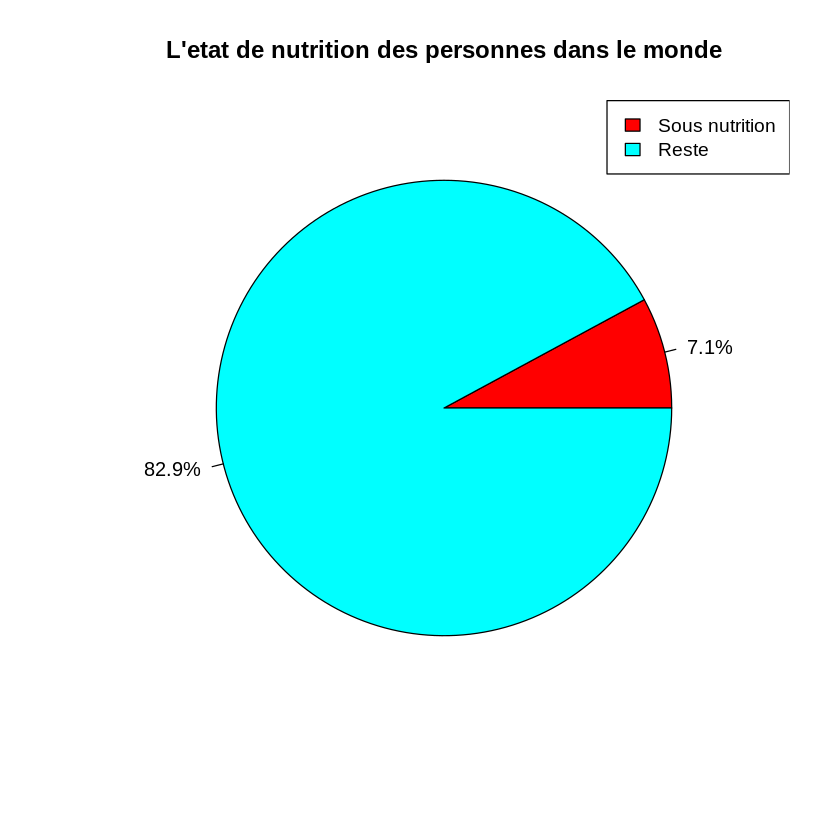

In [355]:
nombre_personnes_sous_nutrition_2017 <- sum(population_sous_nutrition_2017$Valeur_sous) #535700000
print(paste("Le nombre de personnes en état de sous nutrition est :", format(nombre_personnes_sous_nutrition_2017), "."))      
      
tot_pourcentage_personnes_sous_nutrition_2017 <- nombre_personnes_sous_nutrition_2017 * 100 / pop_mond_tot_2017#La proportion de personnes en état de sous-nutrition; 7.1 %
print(paste("La proportion de personnes en état de sous nutrition est :", format(tot_pourcentage_personnes_sous_nutrition_2017, digits=3), "%."))

x <- c(tot_pourcentage_personnes_sous_nutrition_2017,82.9)
labels <- c ("sous nutrition","Reste")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels= piepercent, 
main = "L'etat de nutrition des personnes dans le monde", col = rainbow(length(x)))
legend("topright", c("Sous nutrition","Reste"), cex = 0.96,
   fill = rainbow(length(x)))

<a id="sec:2-Lenombrethéoriquedepersonnesquipourraientêtrenourries"></a>

---
### 2-Le nombre théorique de personnes qui pourraient être nourries
---

In [356]:
dispo_alimentaire_population_2017 <- merge(dispo_alimentaire, population_2017, by="Zone") #Fusionner les données
head(dispo_alimentaire_population_2017)

Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année_pop,Valeur_pop
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Afghanistan,Abats Comestible,animale,0,0,5,1.72,0.20,0.77,53,0,0,53,0,53,0,0,0,2017,36296113
Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1.29,0.01,0.02,41,2,40,39,2,3,0,0,0,2017,36296113
Afghanistan,Aliments pour enfants,vegetale,0,0,1,0.06,0.01,0.03,2,0,2,2,0,0,0,0,0,2017,36296113
Afghanistan,Ananas,vegetale,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,2017,36296113
Afghanistan,Bananes,vegetale,0,0,4,2.70,0.02,0.05,82,0,82,82,0,0,0,0,0,2017,36296113
Afghanistan,"Beurre, Ghee",animale,0,0,23,1.17,2.61,0.03,36,0,0,36,0,36,0,0,0,2017,36296113


In [357]:
dispo_alimentaire_population_2017 <- dispo_alimentaire_population_2017[, Kcal_zone_an 
                            := as.numeric(`Disponibilité alimentaire (Kcal/personne/jour)`) * 365 * as.numeric(Valeur_pop)] # Calculer Kcal/pays/an:Data.Table

nombre_personnes_nourries_2017 <- (sum(dispo_alimentaire_population_2017$Kcal_zone_an) / 2250/365)# [1] 9297326501
per_nombre_personnes_nourries_2017 <- nombre_personnes_nourries_2017 * 100 / pop_mond_tot_2017 # [1] 123.2446
print(paste("Le nombre théorique de personnes qui pourraient être nourries est :", format(nombre_personnes_nourries_2017), "."))
print(paste("La proportion théorique de personnes qui pourraient être nourries est :", format(per_nombre_personnes_nourries_2017, digits=5), "%."))

[1] "Le nombre théorique de personnes qui pourraient être nourries est : 9297326501 ."
[1] "La proportion théorique de personnes qui pourraient être nourries est : 123.24 %."


[D'après l'Organisation mondiale de la Santé, un homme doit consommer environ 2 500 kilocalories (kcal) par jour, contre 2 000 kcal/jour pour une femme. Il ne s'agit là bien sûr, que de moyennes permettant de maintenir un poids stable, c'est-à-dire d'apporter au corps par l'alimentation autant d'énergie qu'il en consomme.](https://www.futura-sciences.com/sante/questions-reponses/nutrition-calories-femme-homme-besoins-differents-733/)

<a id="sec:3-Lenombrethéoriquedepersonnesquipourraientêtrenourriesdesproduitsvégétaux"></a>

---
### 3-Le nombre théorique de personnes qui pourraient être nourries des produits végétaux
---

In [358]:
vegetale_dispo_alimentaire_population_2017 <- dispo_alimentaire_population_2017[Origine=="vegetale"]
head(vegetale_dispo_alimentaire_population_2017)

Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,⋯,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année_pop,Valeur_pop,Kcal_zone_an
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1.29,0.01,0.02,41,⋯,40,39,2,3,0,0,0,2017,36296113,1.324808e+10
Afghanistan,Aliments pour enfants,vegetale,0,0,1,0.06,0.01,0.03,2,⋯,2,2,0,0,0,0,0,2017,36296113,1.324808e+10
Afghanistan,Ananas,vegetale,0,0,0,0.00,0.00,0.00,0,⋯,0,0,0,0,0,0,0,2017,36296113,0.000000e+00
Afghanistan,Bananes,vegetale,0,0,4,2.70,0.02,0.05,82,⋯,82,82,0,0,0,0,0,2017,36296113,5.299232e+10
Afghanistan,Bière,vegetale,0,0,0,0.09,0.00,0.00,3,⋯,3,3,0,0,0,0,0,2017,36296113,0.000000e+00
Afghanistan,Blé,vegetale,0,0,1369,160.23,4.69,36.91,5992,⋯,1173,4895,775,5169,322,0,-350,2017,36296113,1.813662e+13


[1] "Le nombre théorique de personnes qui pourraient être nourries des produits végétaux est : 7671450761 ."
[1] "La proportion théorique de personnes qui pourraient être nourries des produits végétaux est : 101.69 %."


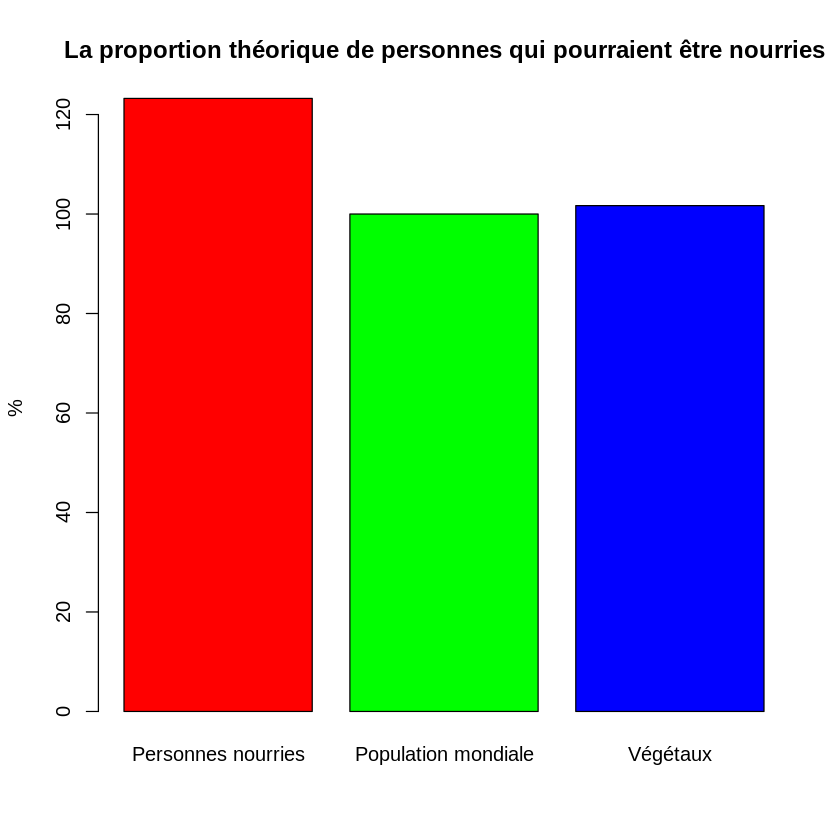

In [359]:
nombre_personnes_nourries_vegetale_2017 <- (sum(vegetale_dispo_alimentaire_population_2017$Kcal_zone_an) / 2250/365) #7671450761
per_nombre_personnes_nourries_vegetale_2017 <- nombre_personnes_nourries_vegetale_2017*100 / pop_mond_tot_2017 #101.69

print(paste("Le nombre théorique de personnes qui pourraient être nourries des produits végétaux est :", format(nombre_personnes_nourries_vegetale_2017), "."))
print(paste("La proportion théorique de personnes qui pourraient être nourries des produits végétaux est :", 
            format(per_nombre_personnes_nourries_vegetale_2017, digits=5), "%."))

H <- c(per_nombre_personnes_nourries_2017,per_pop_mond_tot_2017,per_nombre_personnes_nourries_vegetale_2017)
M <- c("Personnes nourries","Population mondiale","Végétaux")
colors = c("red","green","blue")

barplot(H,names.arg=M,xlab="",ylab="%",col=colors,
main="La proportion théorique de personnes qui pourraient être nourries",border="black")

On constate avec cette analyse qu'il y a 7,1 % de la population mondiale qui souffre de la faim, bien que la disponibilité interne du monde nourrisse 123.24 % de la population, et la disponibilité interne d'une source végétale nourrit 101.69 %, il y a donc un problème d'inégalité dans la répartition entre les pays et les peuples.

<a id="sec:4-disponibilitéintérieure"></a>

---
### 4-L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine
---

In [360]:
eq_1_disp_alim_pop_2017 <- dispo_alimentaire_population_2017 %>% mutate(Disponibilité_intérieure_2= as.numeric(`Aliments pour animaux`) 
+ as.numeric(`Autres Utilisations`) + as.numeric(Nourriture) + as.numeric(Pertes) + as.numeric(Semences) + as.numeric(Traitement))

eq_2_disp_alim_pop_2017 <- eq_1_disp_alim_pop_2017 %>% mutate(Disponibilité_intérieure_3 = as.numeric(Production) 
+ as.numeric(`Importations - Quantité`) + as.numeric(`Variation de stock`) - as.numeric(`Exportations - Quantité`))

eq_final_disp_alim_pop_2017 <- eq_2_disp_alim_pop_2017[,.(Zone, Produit,`Disponibilité intérieure`,`Disponibilité_intérieure_2`,`Disponibilité_intérieure_3`)]
head(eq_final_disp_alim_pop_2017)

Zone,Produit,Disponibilité intérieure,Disponibilité_intérieure_2,Disponibilité_intérieure_3
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,Abats Comestible,53,53,53
Afghanistan,"Agrumes, Autres",41,41,41
Afghanistan,Aliments pour enfants,2,2,2
Afghanistan,Ananas,0,0,0
Afghanistan,Bananes,82,82,82
Afghanistan,"Beurre, Ghee",36,36,36


[1] "La proportion de l'utilisation de la disponibilité intérieure pour l'alimentation humaine est : 49.32 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure pour l'alimentation animale est : 13.22 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure qui est perdue en total (perdue, traitement ou autres) est : 35.9 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure pour semences est : 1.57 %."


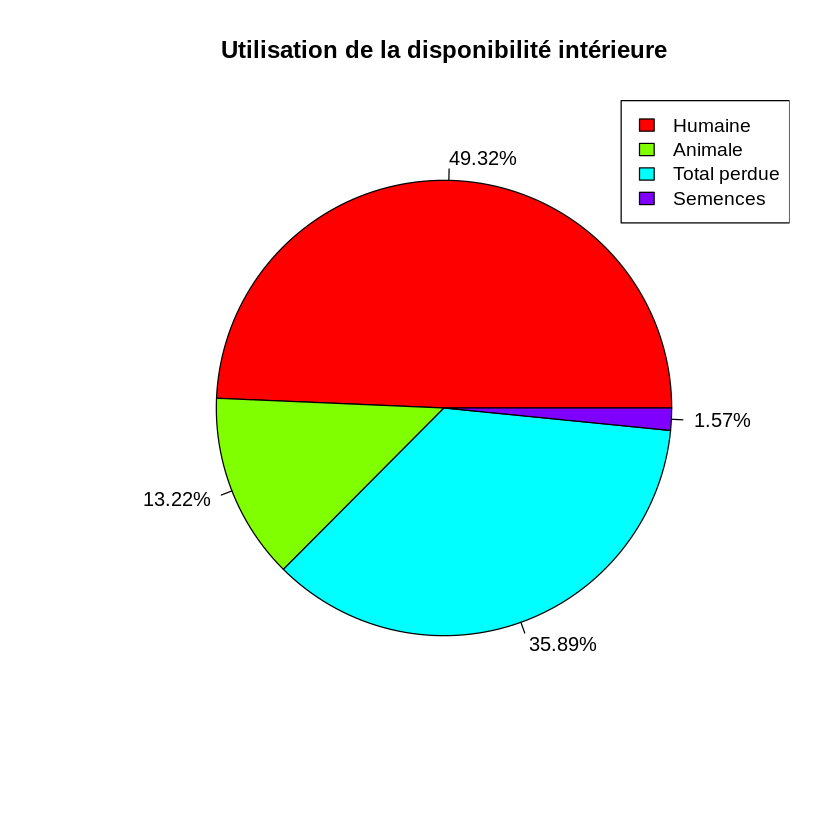

In [361]:
disp_alim_tot <- (sum(eq_2_disp_alim_pop_2017$Disponibilité_intérieure_2))
disp_alim_nourit <- (sum(eq_2_disp_alim_pop_2017$Nourriture))
disp_alim_anim <- (sum(eq_2_disp_alim_pop_2017$`Aliments pour animaux`))
disp_alim_autre <- (sum(eq_2_disp_alim_pop_2017$`Autres Utilisations`))
disp_alim_pert <- (sum(eq_2_disp_alim_pop_2017$Pertes))
disp_alim_semen <- (sum(eq_2_disp_alim_pop_2017$Semences))
disp_alim_trait <- (sum(eq_2_disp_alim_pop_2017$Traitement))

per_disp_alim_nourit <- disp_alim_nourit*100/disp_alim_tot
per_disp_alim_anim <- disp_alim_anim*100/disp_alim_tot
per_disp_alim_perdu_tot <- (disp_alim_autre+disp_alim_pert+disp_alim_trait)*100/disp_alim_tot
per_disp_alim_semen <- disp_alim_semen*100/disp_alim_tot

print(paste("La proportion de l'utilisation de la disponibilité intérieure pour l'alimentation humaine est :", format(per_disp_alim_nourit, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure pour l'alimentation animale est :", format(per_disp_alim_anim, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure qui est perdue en total (perdue, traitement ou autres) est :", 
            format(per_disp_alim_perdu_tot, digits=3), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure pour semences est :", format(per_disp_alim_semen, digits=3), "%."))

x <- c(per_disp_alim_nourit, per_disp_alim_anim, per_disp_alim_perdu_tot, per_disp_alim_semen)
labels <- c ("Humaine","Animale", "Total perdue", "Semences")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels = piepercent, main = "Utilisation de la disponibilité intérieure", col = rainbow(length(x)))
legend("topright", c("Humaine","Animale", "Total perdue", "Semences"), cex = 0.96,
   fill = rainbow(length(x)))

Nous remarquons sur la figure qu'environ la moitié de la disponibilité interne mondiale de nourriture est utilisée pour les humains (49.32 %) et 13.22 % pour Animaux. Plus qu'un tiers (22,43 + 4,64 + 8.81=35.88 %) a été perdus par traitement ou autres malheureusement. Par conséquent, il faut arrêter le gaspillage et réduire la quantité de nourriture perdue.

#### Céréales

In [362]:
cereals_disp_alim_pop_2017 <- dispo_alimentaire_population_2017[Produit=="Avoine" | Produit=="Blé" | Produit=="Céréales, Autres"| 
                                                                 Produit=="Maïs"| Produit=="Millet"| Produit=="Orge"| Produit=="Riz (Eq Blanchi)" 
                                                               | Produit=="Seigle"| Produit=="Sorgho"]
head(cereals_disp_alim_pop_2017)

Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,⋯,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année_pop,Valeur_pop,Kcal_zone_an
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Afghanistan,Blé,vegetale,0,0,1369,160.23,4.69,36.91,5992,⋯,1173,4895,775,5169,322,0,-350,2017,36296113,1.813662e+13
Afghanistan,"Céréales, Autres",vegetale,0,0,0,0.00,0.00,0.00,0,⋯,0,0,0,0,0,0,0,2017,36296113,0.000000e+00
Afghanistan,Maïs,vegetale,200,0,21,2.50,0.30,0.56,313,⋯,1,76,31,312,5,0,0,2017,36296113,2.782097e+11
Afghanistan,Millet,vegetale,0,0,3,0.40,0.02,0.08,13,⋯,0,12,1,13,0,0,0,2017,36296113,3.974424e+10
Afghanistan,Orge,vegetale,360,0,26,2.92,0.24,0.79,524,⋯,10,89,52,514,22,0,0,2017,36296113,3.444501e+11
Afghanistan,Riz (Eq Blanchi),vegetale,0,0,141,13.82,0.27,2.70,461,⋯,119,422,24,342,14,0,0,2017,36296113,1.867979e+12


[1] "La proportion de l'utilisation de la disponibilité intérieure des cereals pour l'alimentation humaine est : 42.91 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure des cereals pour l'alimentation animale est : 36.14 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure des cereals qui est perdue en total (perdue, traitement ou autres) est : 18.1 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure des cereals pour semences est : 2.85 %."


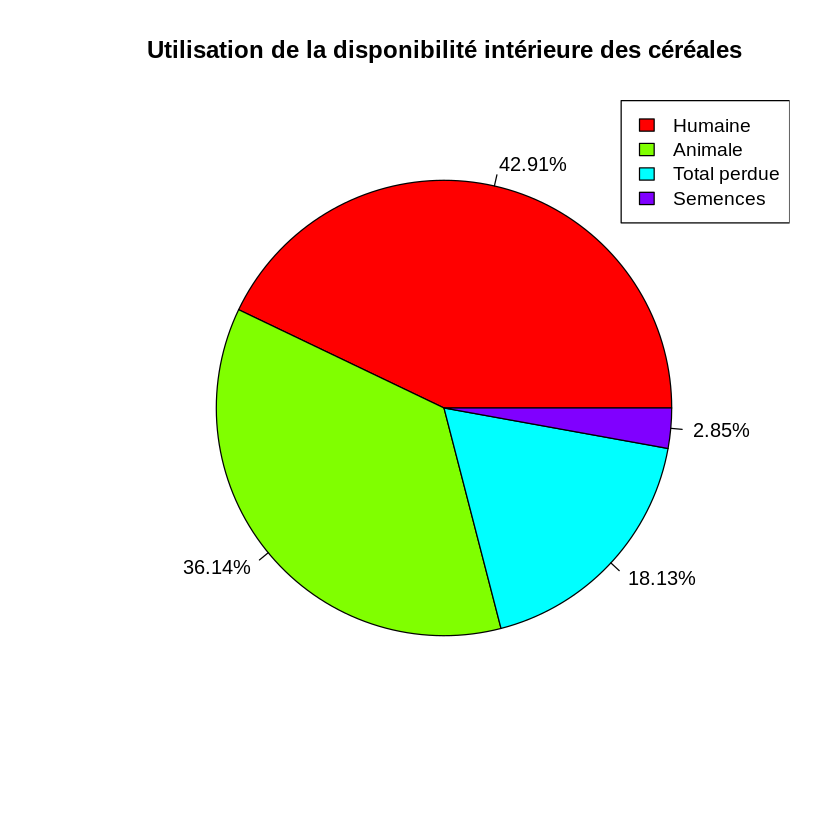

In [363]:
per_cereals_nour_disp_alim_pop_2017 <- sum(cereals_disp_alim_pop_2017$Nourriture)*100/sum(cereals_disp_alim_pop_2017$`Disponibilité intérieure`)
per_cereals_anim_disp_alim_pop_2017 <- sum(cereals_disp_alim_pop_2017$`Aliments pour animaux`)*100/sum(cereals_disp_alim_pop_2017$`Disponibilité intérieure`)
cereals_perdu_tot <- sum(cereals_disp_alim_pop_2017$`Autres Utilisations`)+sum(cereals_disp_alim_pop_2017$Pertes)+sum(cereals_disp_alim_pop_2017$Traitement)
per_cereals_perdu_tot_disp_alim_pop_2017 <- cereals_perdu_tot*100/sum(cereals_disp_alim_pop_2017$`Disponibilité intérieure`)
per_cereals_semences_disp_alim_pop_2017 <- sum(cereals_disp_alim_pop_2017$Semences)*100/sum(cereals_disp_alim_pop_2017$`Disponibilité intérieure`)

print(paste("La proportion de l'utilisation de la disponibilité intérieure des cereals pour l'alimentation humaine est :", 
            format(per_cereals_nour_disp_alim_pop_2017, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure des cereals pour l'alimentation animale est :", 
            format(per_cereals_anim_disp_alim_pop_2017, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure des cereals qui est perdue en total (perdue, traitement ou autres) est :", 
            format(per_cereals_perdu_tot_disp_alim_pop_2017, digits=3), "%."))                                        
print(paste("La proportion de l'utilisation de la disponibilité intérieure des cereals pour semences est :", 
            format(per_cereals_semences_disp_alim_pop_2017, digits=3), "%."))                                            
                                                                                         
x <- c(per_cereals_nour_disp_alim_pop_2017, per_cereals_anim_disp_alim_pop_2017, per_cereals_perdu_tot_disp_alim_pop_2017, 
       per_cereals_semences_disp_alim_pop_2017)
labels <- c("Humaine","Animale", "Total perdue", "Semences")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels = piepercent, main = "Utilisation de la disponibilité intérieure des céréales", col = rainbow(length(x)))
legend("topright", c("Humaine","Animale","Total perdue", "Semences"), cex = 0.96,
   fill = rainbow(length(x)))

On a noté que 18.1 % à été perdu, par apport 42.91 % utilisé pour l'alimentation humaine et 36.14 % pour animaux.

<a id="sec:Julien"></a>

---
## Julien
---

Je poursuives les recherches de Julien (l'ancien data analyst) en répondant aux questions qu'il m'a laissé.

<a id="sec:1-L’utilisationdescéréales"></a>

---
### 1-L’utilisation des céréales
---

In [364]:
percent_format <- function(arg_float) {
    format(round(arg_float, 2), nsmall = 2)
}

my_display <- function(arg_table, arg_string) {
    string_disp_alim_pop_2017 <- arg_table[Produit==arg_string]
    
    per_nour_disp_alim_pop_2017 <- sum(string_disp_alim_pop_2017$Nourriture)*100/sum(string_disp_alim_pop_2017$`Disponibilité intérieure`)
    per_anim_disp_alim_pop_2017 <- sum(string_disp_alim_pop_2017$`Aliments pour animaux`)*100/sum(string_disp_alim_pop_2017$`Disponibilité intérieure`)
    perdu_tot <- sum(string_disp_alim_pop_2017$`Autres Utilisations`)+sum(string_disp_alim_pop_2017$Pertes)+sum(string_disp_alim_pop_2017$Traitement)
    per_perdu_tot_disp_alim_pop_2017 <- perdu_tot*100/sum(string_disp_alim_pop_2017$`Disponibilité intérieure`)    
    per_semences_disp_alim_pop_2017 <- sum(string_disp_alim_pop_2017$Semences)*100/sum(string_disp_alim_pop_2017$`Disponibilité intérieure`)
   

    print(paste("Pour la disponibilité intérieure, le pourcentage de", arg_string, "pour l'alimentation humaine est", percent_format(per_nour_disp_alim_pop_2017), "%."))
    print(paste("Pour la disponibilité intérieure, le pourcentage de", arg_string, "pour l'alimentation animale est", percent_format(per_anim_disp_alim_pop_2017), "%."))
    print(paste("Pour la disponibilité intérieure, le pourcentage de", arg_string, "qui est perdue en total (perdue, traitement ou autres) est", 
                percent_format(per_perdu_tot_disp_alim_pop_2017), "%."))
    print(paste("Pour la disponibilité intérieure, le pourcentage de", arg_string, "pour les semences est", percent_format(per_semences_disp_alim_pop_2017), "%."))
    
    
 x <- c(per_nour_disp_alim_pop_2017, per_anim_disp_alim_pop_2017, per_perdu_tot_disp_alim_pop_2017, 
            per_semences_disp_alim_pop_2017)
labels <- c ("Humaine","Animale", "Total perdue", "Semences")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels = piepercent, main = arg_string, col = rainbow(length(x)))
legend("topright", c("Humaine","Animale", "Total perdue", "Semences"), cex = 0.96,
   fill = rainbow(length(x)))      
}

#### Avoine

![image](L-avoine-si-riche-en-fibres.jpg)

[1] "Pour la disponibilité intérieure, le pourcentage de Avoine pour l'alimentation humaine est 15.35 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Avoine pour l'alimentation animale est 70.40 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Avoine qui est perdue en total (perdue, traitement ou autres) est 3.33 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Avoine pour les semences est 10.88 %."


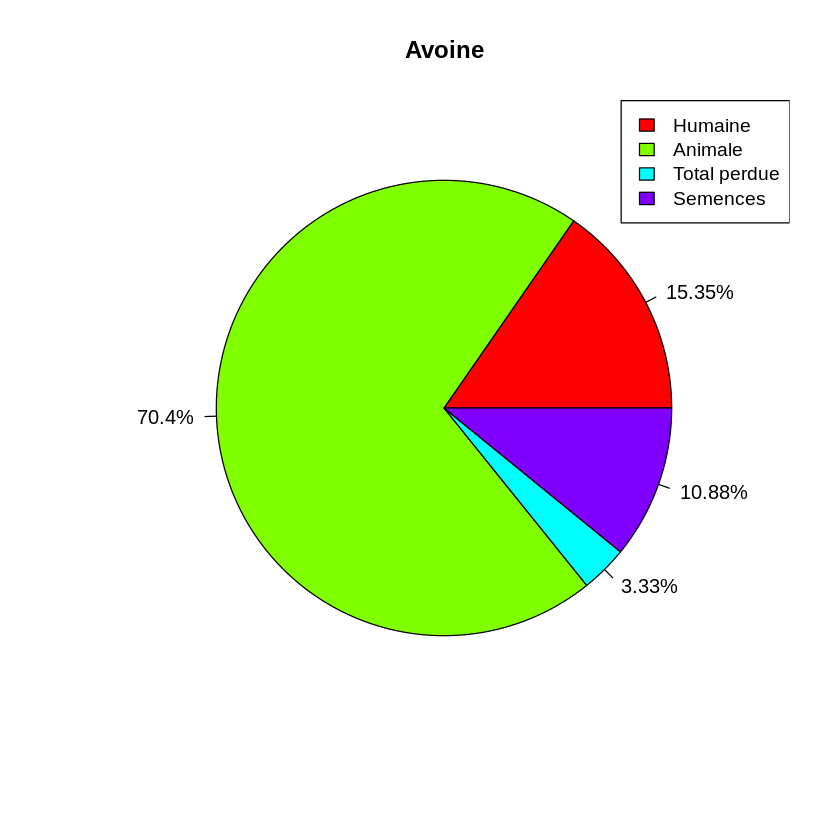

In [365]:
my_display(dispo_alimentaire_population_2017, "Avoine")

#### Blé

[1] "Pour la disponibilité intérieure, le pourcentage de Blé pour l'alimentation humaine est 68.10 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Blé pour l'alimentation animale est 18.39 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Blé qui est perdue en total (perdue, traitement ou autres) est 8.42 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Blé pour les semences est 5.11 %."


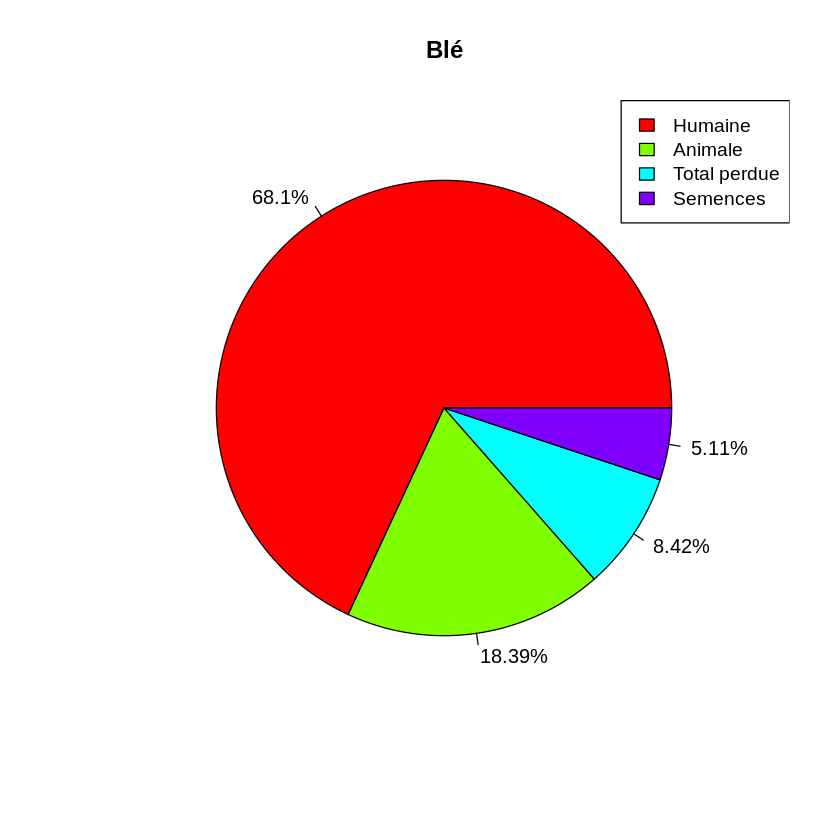

In [366]:
my_display(dispo_alimentaire_population_2017, "Blé")

#### Maïs

[1] "Pour la disponibilité intérieure, le pourcentage de Maïs pour l'alimentation humaine est 13.11 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Maïs pour l'alimentation animale est 57.15 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Maïs qui est perdue en total (perdue, traitement ou autres) est 29.03 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Maïs pour les semences est 0.72 %."


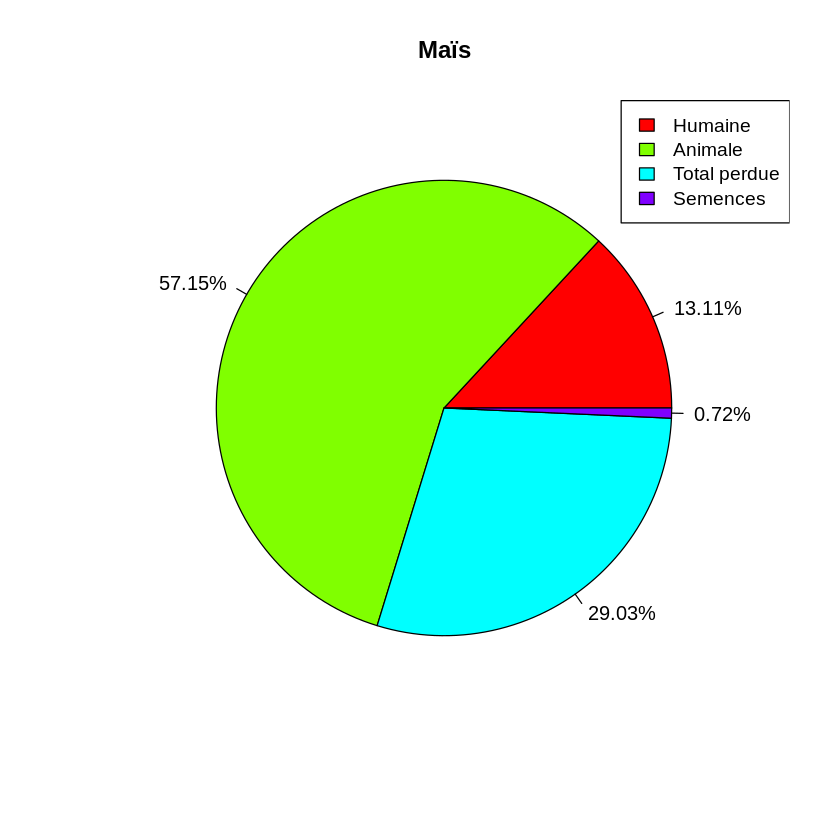

In [367]:
my_display(dispo_alimentaire_population_2017, "Maïs")

#### Millet

![image](millet-graines_shutterstock_1284646522.jpg)

[1] "Pour la disponibilité intérieure, le pourcentage de Millet pour l'alimentation humaine est 77.07 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Millet pour l'alimentation animale est 11.01 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Millet qui est perdue en total (perdue, traitement ou autres) est 9.62 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Millet pour les semences est 2.28 %."


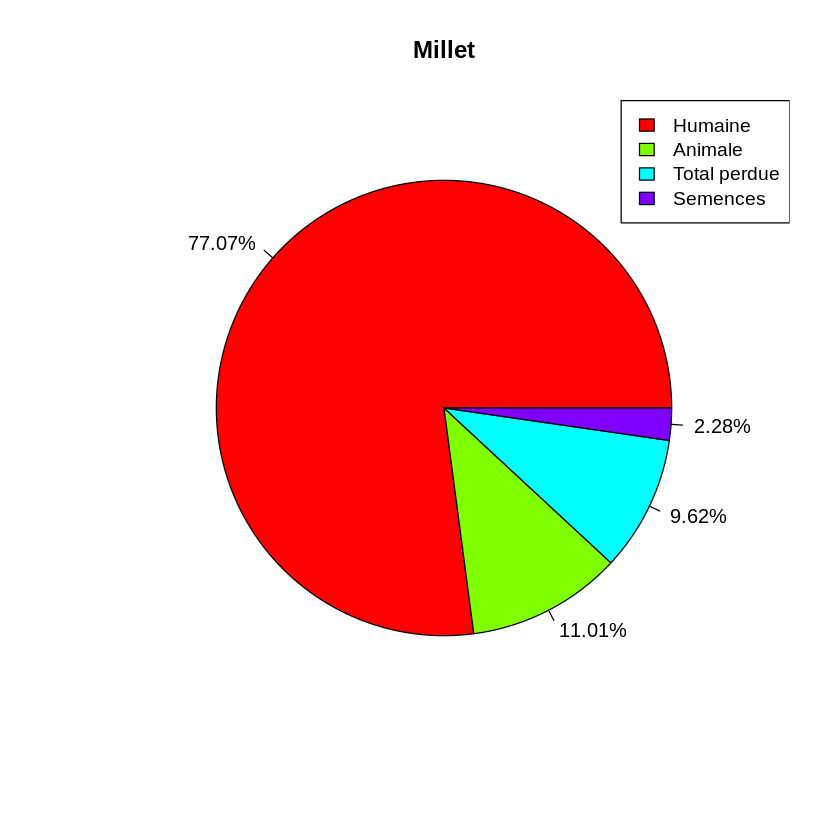

In [368]:
my_display(dispo_alimentaire_population_2017, "Millet")

#### Orge

![image](thinkstockphotos-526136312.jpg)

[1] "Pour la disponibilité intérieure, le pourcentage de Orge pour l'alimentation humaine est 5.03 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Orge pour l'alimentation animale est 66.19 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Orge qui est perdue en total (perdue, traitement ou autres) est 22.42 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Orge pour les semences est 6.36 %."


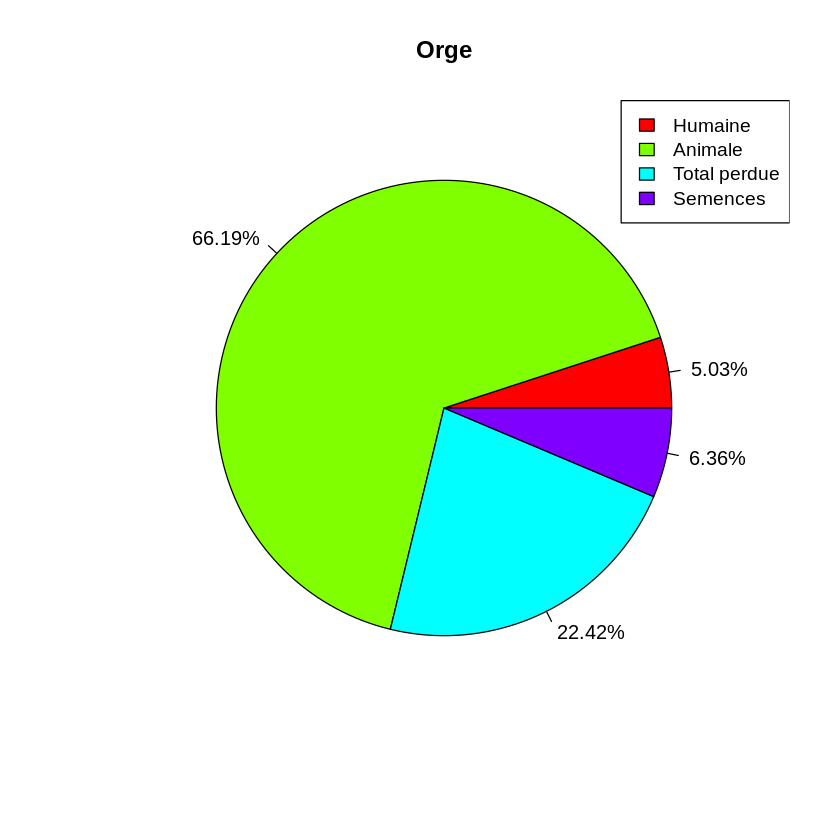

In [369]:
my_display(dispo_alimentaire_population_2017, "Orge")

#### Seigle

![image](grain_cereale_seigle.jpg)

[1] "Pour la disponibilité intérieure, le pourcentage de Seigle pour l'alimentation humaine est 32.69 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Seigle pour l'alimentation animale est 49.34 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Seigle qui est perdue en total (perdue, traitement ou autres) est 10.30 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Seigle pour les semences est 7.66 %."


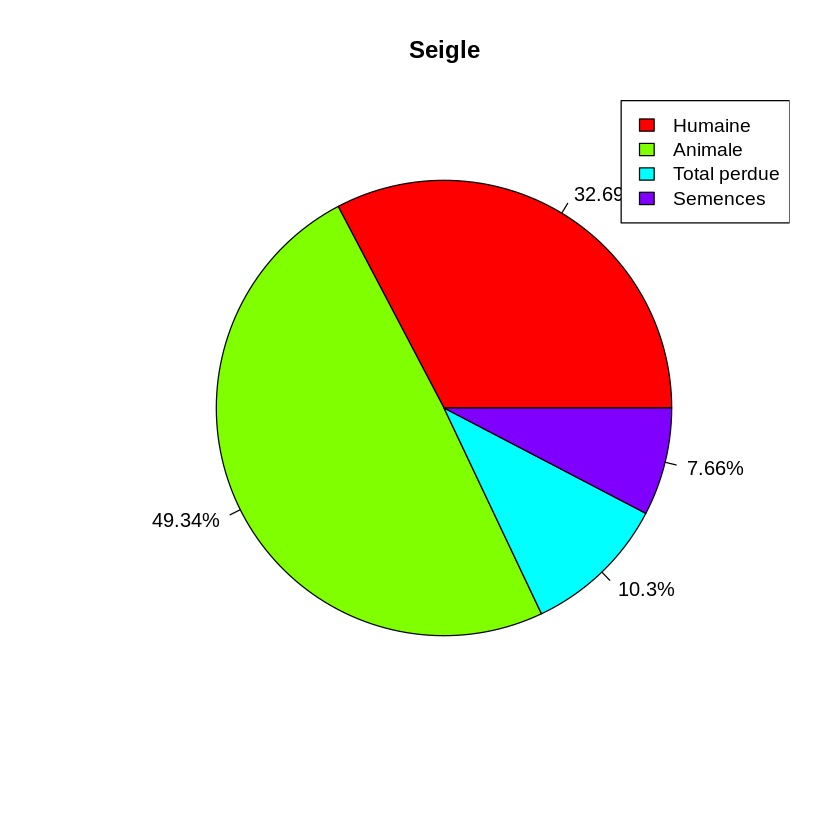

In [370]:
my_display(dispo_alimentaire_population_2017, "Seigle")

#### Sorgho

![image](istock-471729991.jpg)

[1] "Pour la disponibilité intérieure, le pourcentage de Sorgho pour l'alimentation humaine est 41.48 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Sorgho pour l'alimentation animale est 42.58 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Sorgho qui est perdue en total (perdue, traitement ou autres) est 14.58 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Sorgho pour les semences est 1.35 %."


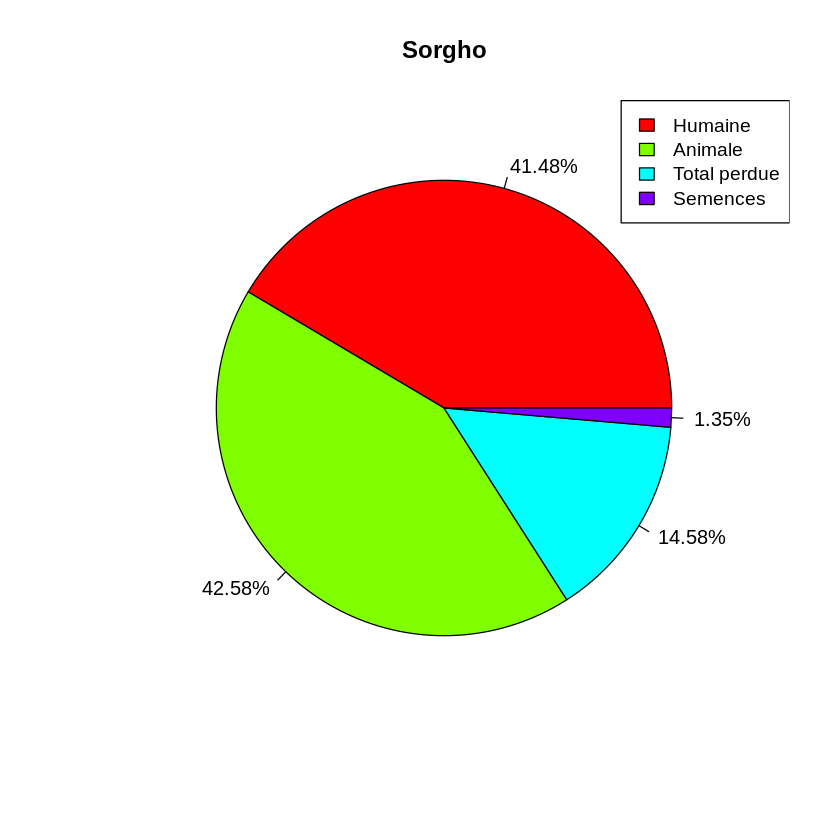

In [371]:
my_display(dispo_alimentaire_population_2017, "Sorgho")

#### Riz

[1] "Pour la disponibilité intérieure, le pourcentage de Riz (Eq Blanchi) pour l'alimentation humaine est 79.31 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Riz (Eq Blanchi) pour l'alimentation animale est 7.07 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Riz (Eq Blanchi) qui est perdue en total (perdue, traitement ou autres) est 11.06 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Riz (Eq Blanchi) pour les semences est 2.57 %."


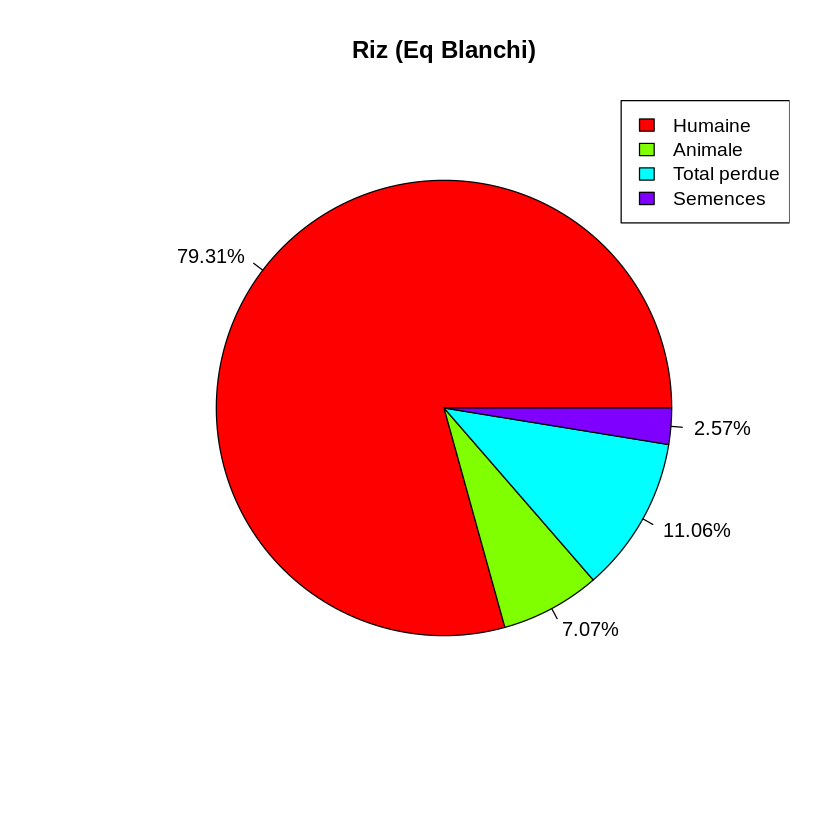

In [372]:
my_display(dispo_alimentaire_population_2017, "Riz (Eq Blanchi)")

#### Céréales, Autres

[1] "Pour la disponibilité intérieure, le pourcentage de Céréales, Autres pour l'alimentation humaine est 19.52 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Céréales, Autres pour l'alimentation animale est 69.07 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Céréales, Autres qui est perdue en total (perdue, traitement ou autres) est 8.55 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Céréales, Autres pour les semences est 4.37 %."


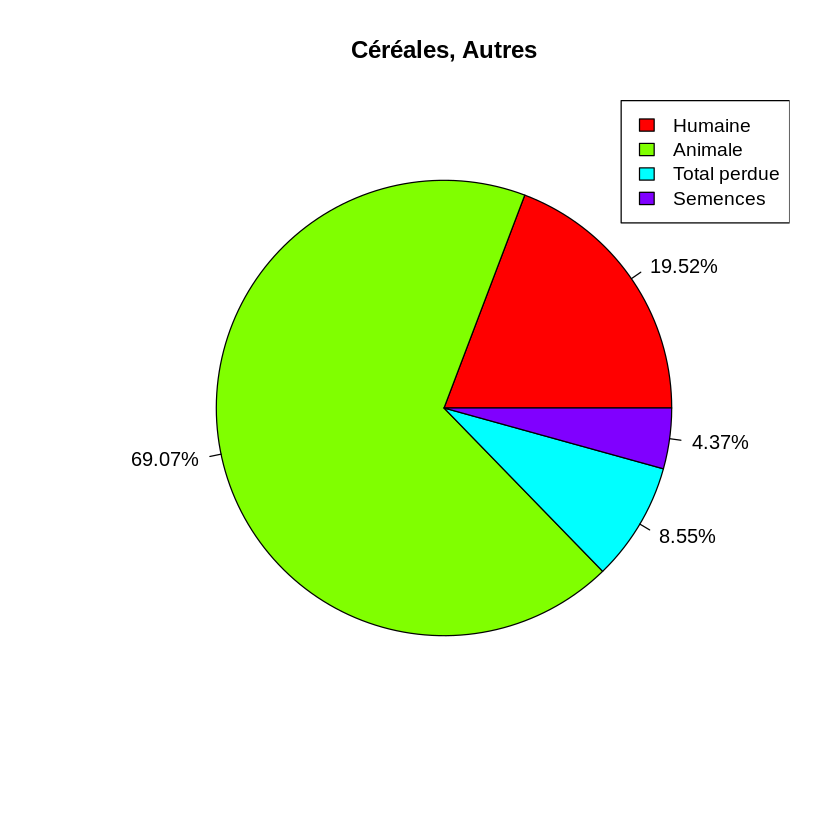

In [373]:
my_display(dispo_alimentaire_population_2017, "Céréales, Autres")

#### Manioc

[1] "Pour la disponibilité intérieure, le pourcentage de Manioc pour l'alimentation humaine est 39.21 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Manioc pour l'alimentation animale est 33.92 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Manioc qui est perdue en total (perdue, traitement ou autres) est 26.87 %."
[1] "Pour la disponibilité intérieure, le pourcentage de Manioc pour les semences est 0.00 %."


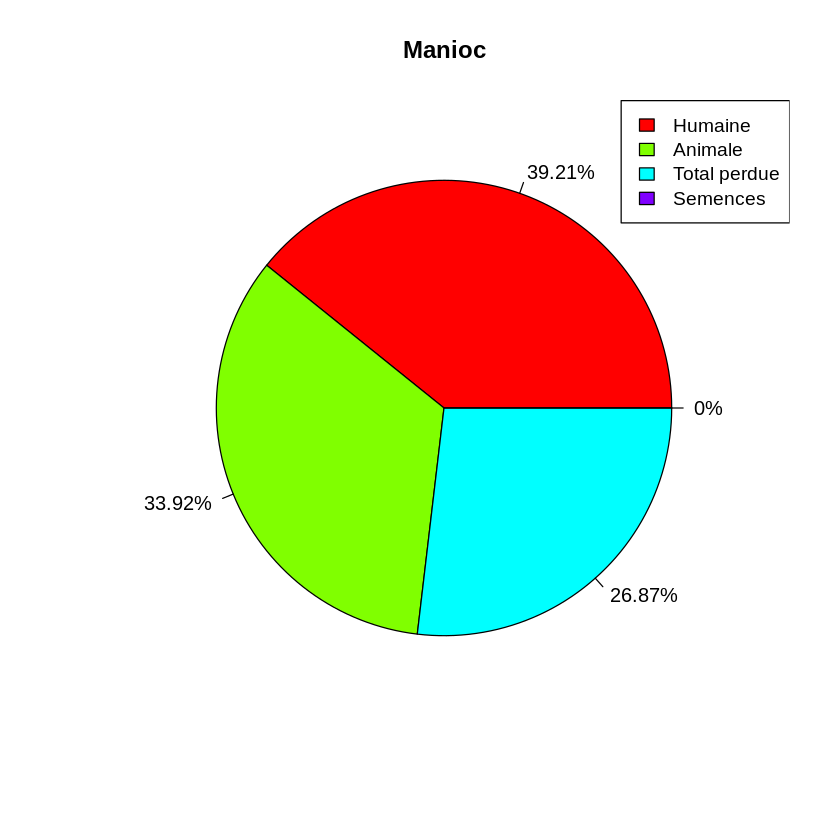

In [374]:
my_display(dispo_alimentaire_population_2017, "Manioc")

<a id="sec:2-ManiocenThaïlande"></a>

---
### 2-Etat particulier : Manioc en Thaïlande
---

![image](istockphoto-1192869169-612x612.jpg)

In [379]:
Thaïlande_Manioc <- eq_2_disp_alim_pop_2017[Zone=="Thaïlande" & Produit=="Manioc"] #Filtrer Thaïlande et Manioc
Thaïlande_Manioc

Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,⋯,Pertes,Production,Semences,Traitement,Variation de stock,Année_pop,Valeur_pop,Kcal_zone_an,Disponibilité_intérieure_2,Disponibilité_intérieure_3
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Thaïlande,Manioc,vegetale,1800,2081,40,13,0.05,0.14,6264,⋯,1511,30228,0,0,0,2017,69209810,1.010463e+12,6263,6264


In [380]:
Thaïlande_pop_sous_nutr_2017 <- population_sous_nutrition_2017[Zone=="Thaïlande", .(Zone, Valeur_sous, pop_sous)]
Thaïlande_pop_sous_nutr_2017

Zone,Valeur_sous,pop_sous
<chr>,<dbl>,<dbl>
Thaïlande,6200000,8.958268


In [381]:
Thaïlande_Manioc_pop_sous_nutr_2017 <- merge(Thaïlande_Manioc, Thaïlande_pop_sous_nutr_2017, by="Zone")   
Thaïlande_Manioc_pop_sous_nutr_2017

Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,⋯,Semences,Traitement,Variation de stock,Année_pop,Valeur_pop,Kcal_zone_an,Disponibilité_intérieure_2,Disponibilité_intérieure_3,Valeur_sous,pop_sous
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Thaïlande,Manioc,vegetale,1800,2081,40,13,0.05,0.14,6264,⋯,0,0,0,2017,69209810,1.010463e+12,6263,6264,6200000,8.958268


[1] "La proportion de l’exportation par rapport à la production de Manioc en Thaïlande est : 83.41 %."


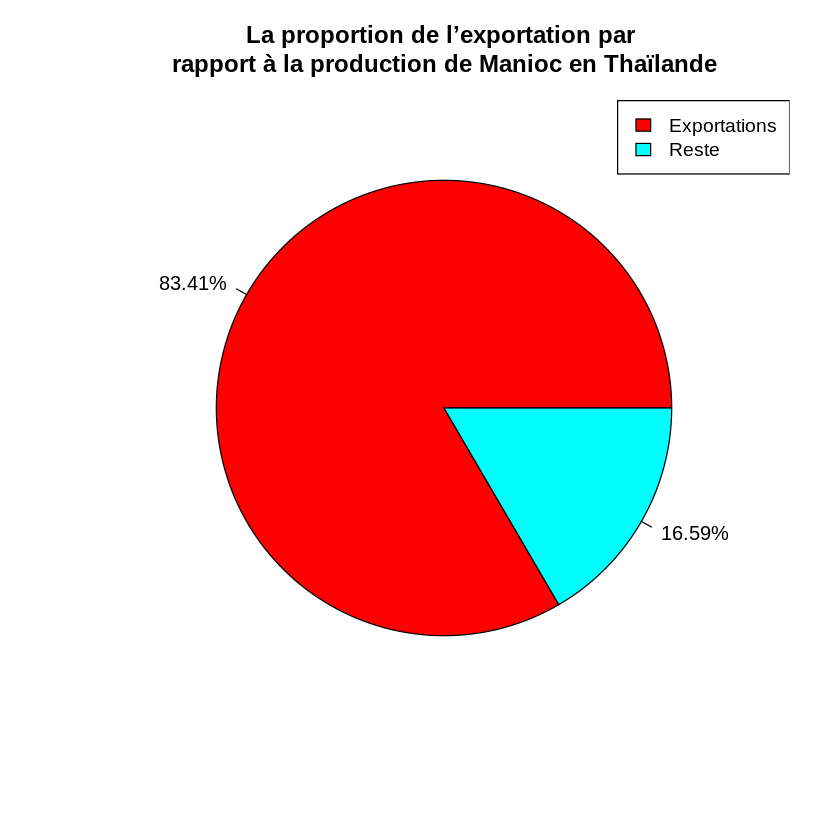

In [387]:
Thaïlande_Manioc_pop_sous_nutr_2017 <- Thaïlande_Manioc_pop_sous_nutr_2017 %>% mutate(per_export_produc = 
                                                                                      as.numeric(`Exportations - Quantité`) * 100 / as.numeric(Production))

print(paste("La proportion de l’exportation par rapport à la production de Manioc en Thaïlande est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_export_produc, digits=4), "%."))

x <- c(Thaïlande_Manioc_pop_sous_nutr_2017$per_export_produc,16.59)
labels <- c ("Exportations","Reste")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels= piepercent, main = "La proportion de l’exportation par 
rapport à la production de Manioc en Thaïlande", col = rainbow(length(x)))
legend("topright", c("Exportations","Reste"), cex = 0.96,
   fill = rainbow(length(x)))

[1] "La proportion de personnes sous nourries qui pourraient être nourries en utilisation de la disponibilité intérieure de Manioc en Thaïlande : 19.85 %."


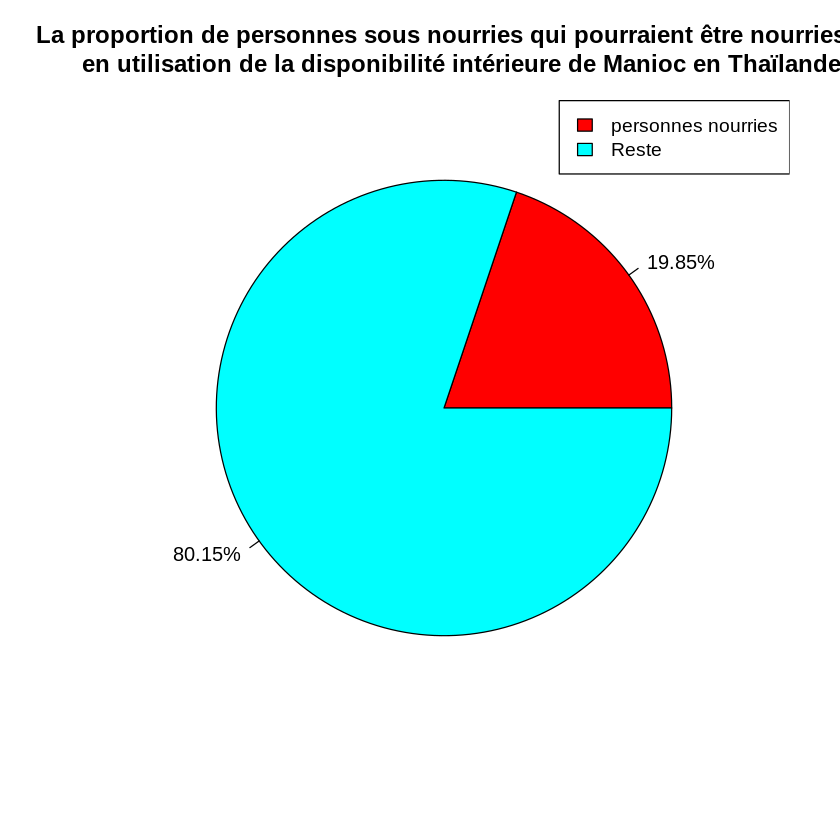

In [389]:
nombre_personnes_nourries_Thaïlande_Manioc_2017 <- Thaïlande_Manioc_pop_sous_nutr_2017$Kcal_zone_an/365/2250

per_personnes_sous_nourries_Thaïlande_Manioc_2017 <-nombre_personnes_nourries_Thaïlande_Manioc_2017*100/Thaïlande_Manioc_pop_sous_nutr_2017$Valeur_sous #19.85 %

print(paste("La proportion de personnes sous nourries qui pourraient être nourries en utilisation de la disponibilité intérieure de Manioc en Thaïlande :", 
            format(per_personnes_sous_nourries_Thaïlande_Manioc_2017, digits=4), "%."))

x <- c(per_personnes_sous_nourries_Thaïlande_Manioc_2017,80.15)
labels <- c ("personnes nourries","Reste")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels= piepercent, 
main = "La proportion de personnes sous nourries qui pourraient être nourries 
     en utilisation de la disponibilité intérieure de Manioc en Thaïlande", col = rainbow(length(x)))
legend("topright", c("personnes nourries","Reste"), cex = 0.96,
   fill = rainbow(length(x)))

[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation humaine est : 13.9 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation animale est : 28.74 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour Autres Utilisations est : 33.22 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande qui est perdue est : 24.12 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour semences est : 0 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande qui est perdue en traitement est : 0 %."


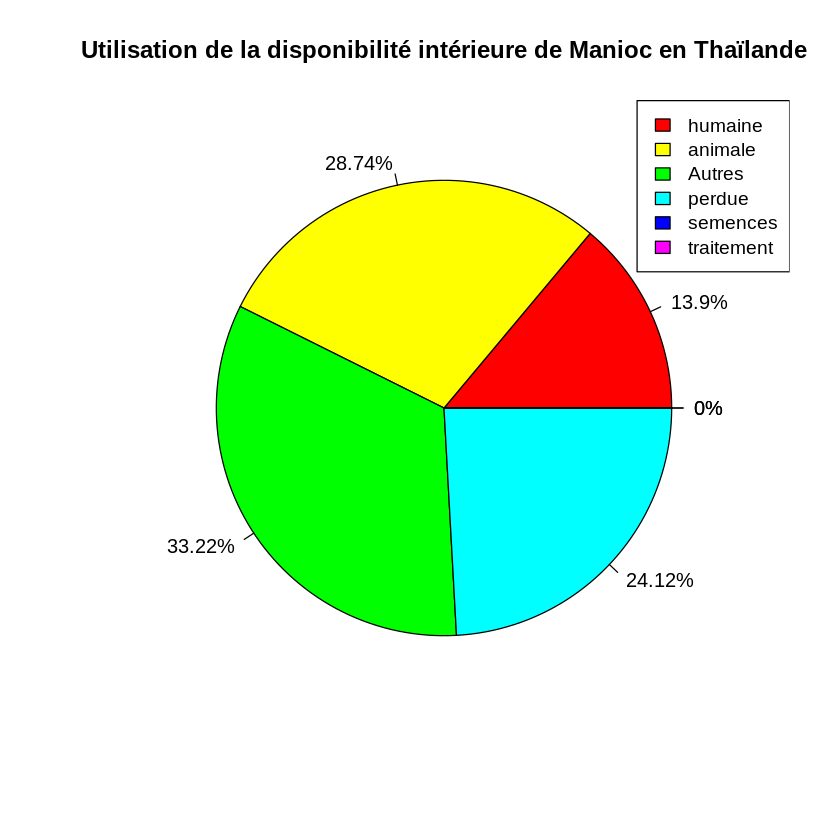

In [391]:
Thaïlande_Manioc_pop_sous_nutr_2017 <- Thaïlande_Manioc_pop_sous_nutr_2017 %>% mutate(per_Nourriture = as.numeric(Nourriture) * 100 / as.numeric(Disponibilité_intérieure_3), 
                                                per_Animalaux = as.numeric(`Aliments pour animaux`) * 100 / as.numeric(Disponibilité_intérieure_3), 
                                                per_Autre = as.numeric(`Autres Utilisations`) * 100 / as.numeric(Disponibilité_intérieure_3),
                                                per_Pertes = as.numeric(Pertes) * 100 / as.numeric(Disponibilité_intérieure_3),
                                                per_Semences= as.numeric(Semences) * 100 / as.numeric(Disponibilité_intérieure_3), 
                                                per_Traitement= as.numeric(Traitement) * 100 / as.numeric(Disponibilité_intérieure_3))

print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation humaine est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Nourriture, digits=3), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation animale est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Animalaux, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour Autres Utilisations est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Autre, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande qui est perdue est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Pertes, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour semences est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Semences, digits=3), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande qui est perdue en traitement est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Traitement, digits=3), "%."))

x <- c(Thaïlande_Manioc_pop_sous_nutr_2017$per_Nourriture, Thaïlande_Manioc_pop_sous_nutr_2017$per_Animalaux, Thaïlande_Manioc_pop_sous_nutr_2017$per_Autre,
       Thaïlande_Manioc_pop_sous_nutr_2017$per_Pertes, Thaïlande_Manioc_pop_sous_nutr_2017$per_Semences, Thaïlande_Manioc_pop_sous_nutr_2017$per_Traitement)
labels <- c("humaine","animale", "Autres", "perdue", "semences", "traitement")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels = piepercent, main = "Utilisation de la disponibilité intérieure de Manioc en Thaïlande", col = rainbow(length(x)))
legend("topright", c("humaine","animale", "Autres", "perdue", "semences", "traitement"), cex = 0.96,
   fill = rainbow(length(x)))

[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation humaine est : 13.9 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation animale est : 28.74 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande qui est perdue en total (perdue, traitement ou autres) est : 57.34 %."
[1] "La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour semences est : 0 %."


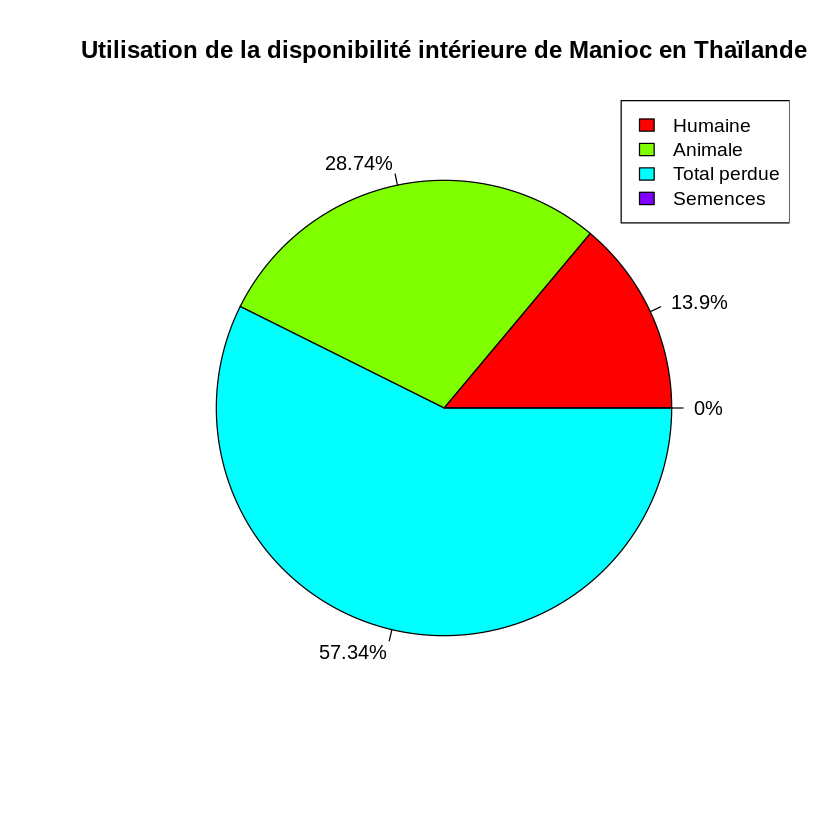

In [392]:
Thaïlande_Manioc_pop_sous_nutr_2017 <- Thaïlande_Manioc_pop_sous_nutr_2017 %>% mutate(per_Nourriture = as.numeric(Nourriture) * 100 / as.numeric(Disponibilité_intérieure_3), 
                            per_Animalaux = as.numeric(`Aliments pour animaux`) * 100 / as.numeric(Disponibilité_intérieure_3), 
                            per_perdu_tot = (as.numeric(`Autres Utilisations`)+as.numeric(Pertes)+as.numeric(Traitement)) * 100 / as.numeric(Disponibilité_intérieure_3),
                             per_Semences= as.numeric(Semences) * 100 / as.numeric(Disponibilité_intérieure_3)) 
                                                
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation humaine est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Nourriture, digits=3), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour l'alimentation animale est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Animalaux, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande qui est perdue en total (perdue, traitement ou autres) est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_perdu_tot, digits=4), "%."))
print(paste("La proportion de l'utilisation de la disponibilité intérieure de Manioc en Thaïlande pour semences est :", 
            format(Thaïlande_Manioc_pop_sous_nutr_2017$per_Semences, digits=3), "%."))

x <- c(Thaïlande_Manioc_pop_sous_nutr_2017$per_Nourriture, Thaïlande_Manioc_pop_sous_nutr_2017$per_Animalaux, Thaïlande_Manioc_pop_sous_nutr_2017$per_perdu_tot,
        Thaïlande_Manioc_pop_sous_nutr_2017$per_Semences)
labels <- c("Humaine","Animale", "Total perdue", "Semences")
piepercent<- paste0(round(x, 2), "%")
pie(x, labels = piepercent, main = "Utilisation de la disponibilité intérieure de Manioc en Thaïlande", col = rainbow(length(x)))
legend("topright", c("Humaine","Animale", "Total perdue", "Semences"), cex = 0.96,
   fill = rainbow(length(x)))

Bien que la récolte de manioc produit en Thaïlande puisse nourrir environ 19.85 % de la population sous nourries, 83.41 % de la production sont exportées à l'étranger. On a noté qu'il y a 57.34 % à été perdu, par apport 13.9 % a utilisé pour l'alimentation humaine et 28.74 % pour animaux. On a trouvé que Thaïlande a exporté du manioc malgré le besoin urgent, et aussi une mauvaise utilisation de la récolte en gaspillant la plus grande partie 57.34 % par aport 26.87 % en monde entière.

<a id="sec:Mélanie"></a>

---
## Mélanie
---

 L'étude demandée par Mélanie (une autre chercheuse de l’équipe) est  un peu plus fine pour chacun des pays:

<a id="sec:1-Lespayspourlesquelslaproportiondepersonnessous-alimentéesestlaplusforteen2017"></a>

---
### 1-Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
---

In [393]:
head(population_sous_nutrition_2017)

Zone,Année_pop,Valeur_pop,Année_sous,Valeur_sous,pop_sous
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,2017,36296113,2016-2018,10500000,28.928718
Afrique du Sud,2017,57009756,2016-2018,3100000,5.437666
Albanie,2017,2884169,2016-2018,100000,3.467203
Algérie,2017,41389189,2016-2018,1300000,3.140917
Allemagne,2017,82658409,2016-2018,0,0.000000
Andorre,2017,77001,2016-2018,0,0.000000


In [394]:
pays_per_person_sous_nutr_2017 <- population_sous_nutrition_2017[,-c("Année_sous", "Année_pop")] # Nettoyage et organisé de tableau

Top_pays_per_person_sous_nutr_2017 <- pays_per_person_sous_nutr_2017[order(pays_per_person_sous_nutr_2017$pop_sous, decreasing = TRUE),]

head(Top_pays_per_person_sous_nutr_2017, 10)

Zone,Valeur_pop,Valeur_sous,pop_sous
<chr>,<dbl>,<dbl>,<dbl>
Haïti,10982366,5300000,48.25918
République populaire démocratique de Corée,25429825,12000000,47.18868
Madagascar,25570512,10500000,41.06292
Libéria,4702226,1800000,38.27974
Lesotho,2091534,800000,38.24944
Tchad,15016753,5700000,37.95761
Rwanda,11980961,4200000,35.05562
Mozambique,28649018,9400000,32.81090
Timor-Leste,1243258,400000,32.17353


<a id="sec:2-Lespaysquiontleplusbénéficiéd’aidedepuis2013"></a>

---
### 2-Les pays qui ont le plus bénéficié d’aide depuis 2013
---

In [395]:
pays_plus_benef_aid_dep_2013 <- aide_alimentaire %>% group_by(Zone) %>%
                                        summarise(Valeur_aid = sum(Valeur)) %>%
                                        distinct(Zone, .keep_all = T)

Top_pays_plus_benef_aid_dep_2013 <- pays_plus_benef_aid_dep_2013[order(pays_plus_benef_aid_dep_2013$Valeur_aid, decreasing = TRUE),]

head(Top_pays_plus_benef_aid_dep_2013, 10)

Zone,Valeur_aid
<chr>,<dbl>
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


<a id="sec:3-Lespaysayantleplusoulemoinsdedisponibilité/habitant"></a>

---
### 3-Les pays ayant le plus ou le moins de disponibilité/habitant
---

In [396]:
pays_disp_alim_pop_2017 <- dispo_alimentaire_population_2017 %>% group_by(Zone) %>%
  summarise(kcal_pays = sum(Kcal_zone_an)) %>%
  distinct(Zone, .keep_all = T)

#population_2017 <- population_2017[,-c("Année_pop")]

pays_disp_alim_pop_2017 <- merge(pays_disp_alim_pop_2017, population_2017, by="Zone")

pays_disp_alim_pop_2017 <- pays_disp_alim_pop_2017 %>% mutate(disp_sur_pop = kcal_pays / Valeur_pop)

pays_disp_alim_pop_2017_res <- pays_disp_alim_pop_2017[,c("Zone", "disp_sur_pop")]

In [397]:
Down_pays_disp_alim_pop_2017_res <- pays_disp_alim_pop_2017_res[order(pays_disp_alim_pop_2017_res$disp_sur_pop),]

head(Down_pays_disp_alim_pop_2017_res,10)

,Zone,disp_sur_pop
,<chr>,<dbl>
132,République centrafricaine,685835
171,Zambie,702260
98,Madagascar,750440
1,Afghanistan,761755
71,Haïti,762485
137,République populaire démocratique de Corée,763945
157,Tchad,769785
172,Zimbabwe,771245
121,Ouganda,775990


In [398]:
Top_pays_disp_alim_pop_2017_res <- pays_disp_alim_pop_2017_res[order(pays_disp_alim_pop_2017_res$disp_sur_pop, decreasing = TRUE),]

head(Top_pays_disp_alim_pop_2017_res, 10)

,Zone,disp_sur_pop
,<chr>,<dbl>
12,Autriche,1376050
18,Belgique,1364005
164,Turquie,1353420
55,États-Unis d'Amérique,1343930
81,Israël,1317650
79,Irlande,1314730
82,Italie,1305970
96,Luxembourg,1292100
48,Égypte,1284070


On a noté que les dix pays les plus touchés par la pauvreté alimentaire sont des pays en développement situés en Afrique et en Asie.

<a id="sec:Mélanie4"></a>

---
### 4-Des infos utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire
---

Les pays ayant le plus ou le moins de Le nombre théorique de personnes qui pourraient être nourries

In [399]:
nmb_per_nur_pays_2017 <- pays_disp_alim_pop_2017 %>% mutate(nmb_per_nur = kcal_pays/365/2250)

pop_per_nur_pays_2017 <- nmb_per_nur_pays_2017 %>% mutate(pop_nur_per = nmb_per_nur*100/Valeur_pop)

In [245]:
Down_pop_per_nur_pays_2017 <- pop_per_nur_pays_2017[order(pop_per_nur_pays_2017$pop_nur_per),]

head(Down_pop_per_nur_pays_2017,10)

,Zone,kcal_pays,Année_pop,Valeur_pop,disp_sur_pop,nmb_per_nur,pop_nur_per
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
132,République centrafricaine,3.152113e+12,2017,4596023,685835,3838190,83.51111
171,Zambie,1.183561e+13,2017,16853599,702260,14411700,85.51111
98,Madagascar,1.918914e+13,2017,25570512,750440,23365766,91.37778
1,Afghanistan,2.764875e+13,2017,36296113,761755,33666661,92.75556
71,Haïti,8.373889e+12,2017,10982366,762485,10196517,92.84444
137,République populaire démocratique de Corée,1.942699e+13,2017,25429825,763945,23655388,93.02222
157,Tchad,1.155967e+13,2017,15016753,769785,14075703,93.73333
172,Zimbabwe,1.097990e+13,2017,14236595,771245,13369745,93.91111
121,Ouganda,3.194486e+13,2017,41166588,775990,38897852,94.48889


In [246]:
Top_pop_per_nur_pays_2017 <- pop_per_nur_pays_2017[order(pop_per_nur_pays_2017$pop_nur_per, decreasing = TRUE),]

head(Top_pop_per_nur_pays_2017, 10)

,Zone,kcal_pays,Année_pop,Valeur_pop,disp_sur_pop,nmb_per_nur,pop_nur_per
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
12,Autriche,1.213662e+13,2017,8819901,1376050,14778234.1,167.5556
18,Belgique,1.557659e+13,2017,11419748,1364005,18966932.6,166.0889
164,Turquie,1.097846e+14,2017,81116450,1353420,133679909.6,164.8000
55,États-Unis d'Amérique,4.368912e+14,2017,325084756,1343930,531983142.9,163.6444
81,Israël,1.086251e+13,2017,8243848,1317650,13226796.1,160.4444
79,Irlande,6.249278e+12,2017,4753279,1314730,7609471.5,160.0889
82,Italie,7.923803e+13,2017,60673701,1305970,96484667.6,159.0222
96,Luxembourg,7.648069e+11,2017,591910,1292100,931271.7,157.3333
48,Égypte,1.238390e+14,2017,96442591,1284070,150793349.0,156.3556


Les pays ayant le plus ou le moins de Le nombre théorique de personnes qui pourraient être nourries des produits végétaux

In [247]:
veg_pays_disp_alim_pop_2017 <- vegetale_dispo_alimentaire_population_2017 %>% group_by(Zone) %>%
  summarise(kcal_pays = sum(Kcal_zone_an)) %>%
  distinct(Zone, .keep_all = T)

#population_2017 <- population_2017[,-c("Année_pop")]

veg_pays_disp_alim_pop_2017 <- merge(veg_pays_disp_alim_pop_2017, population_2017, by="Zone")

veg_pays_disp_alim_pop_2017 <- veg_pays_disp_alim_pop_2017 %>% mutate(disp_sur_pop = kcal_pays / Valeur_pop)

veg_nmb_per_nur_pays_2017 <- veg_pays_disp_alim_pop_2017 %>% mutate(nmb_per_nur = kcal_pays/365/2250)

veg_pop_per_nur_pays_2017 <- veg_nmb_per_nur_pays_2017 %>% mutate(pop_nur_per = nmb_per_nur*100/Valeur_pop)

In [248]:
Down_veg_pop_per_nur_pays_2017 <- veg_pop_per_nur_pays_2017[order(veg_pop_per_nur_pays_2017$pop_nur_per),]

head(Down_veg_pop_per_nur_pays_2017,10)

,Zone,kcal_pays,Année_pop,Valeur_pop,disp_sur_pop,nmb_per_nur,pop_nur_per
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
7,Antigua-et-Barbuda,5.694785e+10,2017,95426,596775,69342.89,72.66667
132,République centrafricaine,2.806538e+12,2017,4596023,610645,3417398.44,74.35556
108,Mongolie,1.908237e+12,2017,3113786,612835,2323576.31,74.62222
51,Équateur,1.061137e+13,2017,16785361,632180,12920997.89,76.97778
22,Bolivie (État plurinational de),7.312852e+12,2017,11192855,653350,8904537.98,79.55556
171,Zambie,1.118354e+13,2017,16853599,663570,13617707.99,80.80000
143,Sainte-Lucie,1.202077e+11,2017,180954,664300,146371.68,80.88889
141,Saint-Kitts-et-Nevis,3.459249e+10,2017,52045,664665,42121.75,80.93333
151,Soudan,2.717193e+13,2017,40813397,665760,33086060.50,81.06667


In [249]:
Top_veg_pop_per_nur_pays_2017 <- veg_pop_per_nur_pays_2017[order(veg_pop_per_nur_pays_2017$pop_nur_per, decreasing = TRUE),]

head(Top_veg_pop_per_nur_pays_2017, 10)

,Zone,kcal_pays,Année_pop,Valeur_pop,disp_sur_pop,nmb_per_nur,pop_nur_per
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
48,Égypte,1.122225e+14,2017,96442591,1163620,136648436,141.6889
164,Turquie,9.299717e+13,2017,81116450,1146465,113238564,139.6000
104,Maroc,3.988356e+13,2017,35581255,1120915,48564460,136.4889
162,Tunisie,1.239860e+13,2017,11433443,1084415,15097226,132.0444
4,Algérie,4.403706e+13,2017,41389189,1063975,53621994,129.5556
44,Cuba,1.202743e+13,2017,11339254,1060690,14645276,129.1556
64,Ghana,3.054871e+13,2017,29121465,1049010,37197818,127.7333
90,Koweït,4.136450e+12,2017,4056099,1019810,5036774,124.1778
81,Israël,8.404150e+12,2017,8243848,1019445,10233363,124.1333


<a id="sec:Conclusion"></a>

---
# Conclusion et perspectives
---

- Il y a 7 % de la population mondiale qui souffre de la faim, bien que la disponibilité interne du monde nourrisse 123% de la population, et la disponibilité interne d'une source végétale nourrit 101%, il y a donc un problème d'inégalité dans la répartition entre les pays et les peuples.

- Les dix pays les plus touchés par la pauvreté alimentaire sont des pays en développement situés en Afrique et en Asie.

- Une étude sur les raisons de mauvaises distributions de la nourriture entre les pays riches et des pays en développement pourra être réalisées afin de réaliser une distribution équitable.

- Une étude sur les raisons d'importantes quantités perdues en totale pourra être réalisée pour trouver des solutions pour arrêter le gaspillage et réduire la quantité de nourriture perdue.

---
# Mohamad ALI